# Analyse des Ventes d'une Société de Smartphones et gadgets

## Le but de ce projet c'est de répondre à certaines questions

### Questions

1. Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaires ?  
2. Dans quelle ville nous avons enregistré un maximum de commandes ?  
3. Quel produit se vend le plus ?  
4. En quel moment doit-on faire une campagne publicitaire pour avoir le plus de ventes ?  
5. ......

### Importer les librairies nécessaires

In [126]:
import pandas as pd
import numpy as np
import os

In [125]:
# on affiche les noms des fichiers qui sont dans le dossier "Donnees'
# Données de ventes chaque mois: 
chemin = r"C:\Users\Pc\TP\Analyse des ventes\Donnees"
for i in os.listdir(chemin):
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [127]:
# Menant on doit les concaténer pour avoir une seule fichier de vente de l'année 2019

data = pd.DataFrame()

for i in os.listdir(chemin):
    df = pd.read_csv(chemin+'/'+i)
    data = pd.concat([data,df])
    
data.head()    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# On enregistre 'data' dans un seul fichier '.csv'

data.to_csv("donnees_ventes_2019.csv",index=False)

In [5]:
df = pd.read_csv("donnees_ventes_2019.csv")

In [6]:
# Menant on va ne travailler qu'avec "df"
df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Notre data contient __186 850 lignes__ et **6 colonnes**.  
Il y a **186 305** lignes non nulles et **545 lignes** nulles.

In [9]:
# On va supprimer les lignes vides
df = df.dropna(how="all")

In [10]:
# Verification
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Menant on doit changer les types des colonnes

In [12]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
# Dans la colonne 'Order ID' ne contient pas que des nombres on doit supprimer ces lignes

In [13]:
df[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
df = df[df["Order ID"] != "Order ID"]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### On remarque qu'au debut on avait 186 850 lignes puis 186 305 lignes et menant on a 185950 lignes

In [19]:
# Changement de types de donnees

In [17]:
df["Order ID"] = df["Order ID"].astype(int)
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float) 
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [18]:
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Ajouton d'autres colones : mois, ville, chiffre d'affaire....

In [21]:
df["Sales"] = df["Quantity Ordered"]*df["Price Each"] 

In [23]:
df["Month"] = df["Order Date"].dt.month

In [25]:
def city(address):
    return address.split(',')[1].strip(' ')

# Exp
city('917 1st St, Dallas, TX 75001')

'Dallas'

In [26]:
df["City"] = df["Purchase Address"].apply(city) 

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


## Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire ?

In [29]:
df.groupby(["Month"])["Sales"].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [30]:
indices = df.groupby(["Month"])["Sales"].sum().index
valeurs = df.groupby(["Month"])["Sales"].sum()

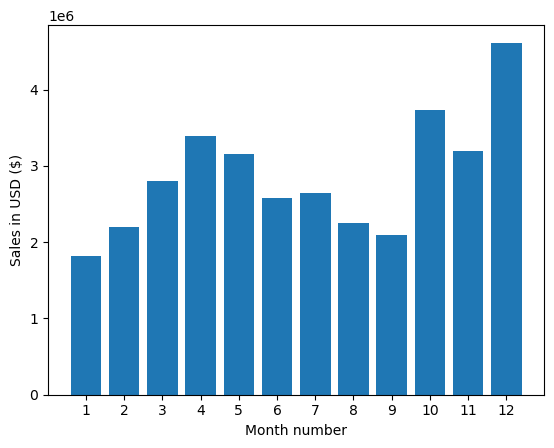

In [31]:
import matplotlib.pyplot as plt

plt.bar(indices,valeurs)
plt.xticks(indices)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show() 

## Dans quelle ville nous avons enregistré un maximum de commandes ?

In [33]:
df.groupby(["City"])["Order ID"].count()

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: Order ID, dtype: int64

In [114]:
"""villes = df.groupby(["City"]).count()["Order ID"].index
valeurs = df.groupby(["City"]).count()["Order ID"]
plt.pie(valeurs ,labels = villes)
plt.show()"""

'villes = df.groupby(["City"]).count()["Order ID"].index\nvaleurs = df.groupby(["City"]).count()["Order ID"]\nplt.pie(valeurs ,labels = villes)\nplt.show()'

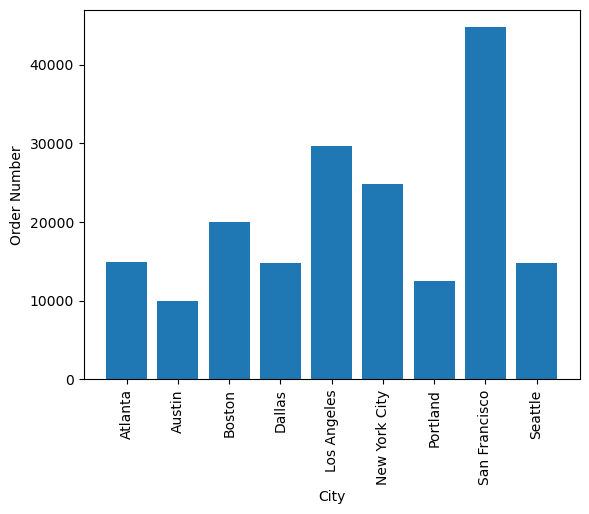

In [34]:
villes = df.groupby(["City"]).count()["Order ID"].index
valeurs = df.groupby(["City"]).count()["Order ID"]
plt.bar(villes,valeurs)
plt.xticks(rotation='vertical')
plt.ylabel('Order Number')
plt.xlabel('City')
plt.show() 

## Quel produit se vent le plus ? Et Pourquoi pensez-vous qu'il s'est vendu le plus ? 

In [35]:
df.groupby(["Product"])["Quantity Ordered"].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

<Axes: xlabel='Product'>

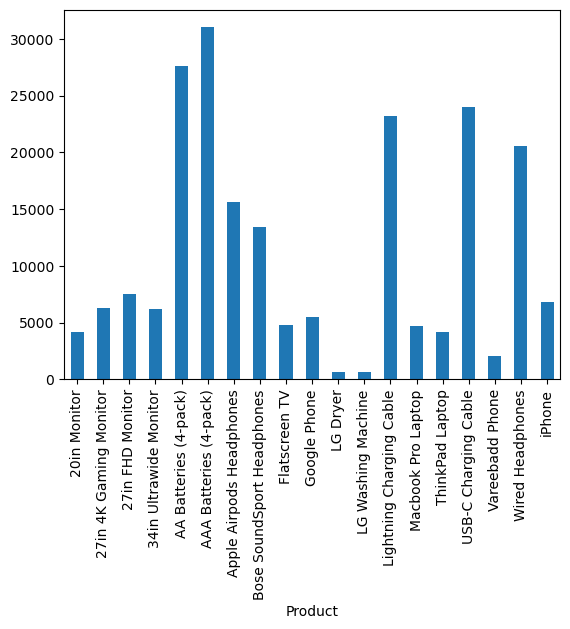

In [36]:
df.groupby(["Product"])["Quantity Ordered"].sum().plot(kind="bar")

In [118]:
indices = df.groupby(["Product"])["Quantity Ordered"].sum().index
Quantite_commandee = df.groupby(["Product"])["Quantity Ordered"].sum()

indices2 = df.groupby('Product')['Price Each'].mean().index
Prix = df.groupby('Product')['Price Each'].mean()

C:\Users\Pc\AppData\Local\Temp\ipykernel_12460\2584352633.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(indices, rotation='vertical', size=8)
C:\Users\Pc\AppData\Local\Temp\ipykernel_12460\2584352633.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


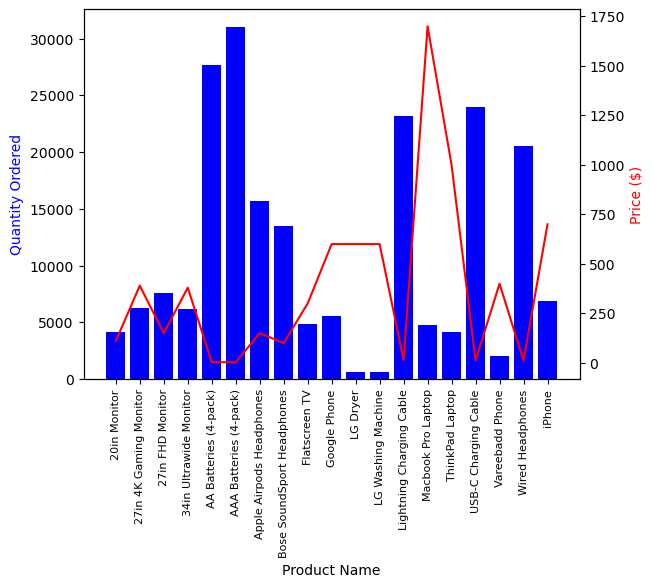

In [124]:

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx()

ax1.bar(indices, Quantite_commandee, color='b')
ax2.plot(indices2, Prix, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(indices, rotation='vertical', size=8)

fig.show() 

## En quelle moment doit on faire une compagne publicitaire pour avoir le plus de ventes ?

In [37]:
# Une autre colonne "Heure"
df["Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9


In [38]:
df.groupby(["Hour"])["Order ID"].count()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

Text(0, 0.5, 'Nombre de commande')

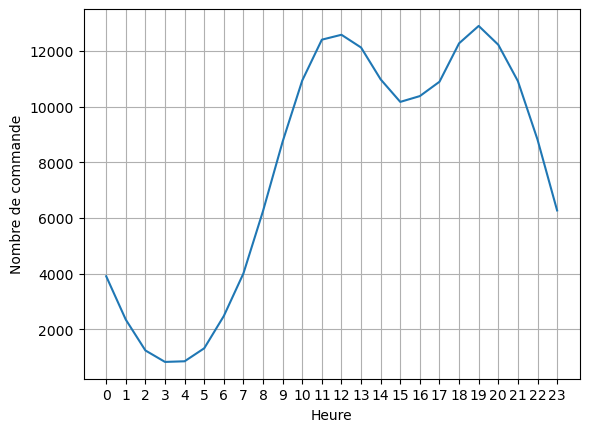

In [40]:
indices = df.groupby(["Hour"])["Order ID"].count().index
valeurs = df.groupby(["Hour"])["Order ID"].count()

plt.grid()
plt.plot(indices,valeurs)
plt.xticks(indices)
plt.xlabel('Heure')
plt.ylabel('Nombre de commande') 

## Quels produits sont le plus souvent vendus ensemble ?

In [101]:
df2 = df[df["Order ID"].duplicated(keep=False)]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11


In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 3 to 186842
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          14649 non-null  int32         
 1   Product           14649 non-null  object        
 2   Quantity Ordered  14649 non-null  int32         
 3   Price Each        14649 non-null  float64       
 4   Order Date        14649 non-null  datetime64[ns]
 5   Purchase Address  14649 non-null  object        
 6   Sales             14649 non-null  float64       
 7   Month             14649 non-null  int64         
 8   City              14649 non-null  object        
 9   Hour              14649 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 1.1+ MB


In [104]:
df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df2.head()

C:\Users\Pc\AppData\Local\Temp\ipykernel_12460\2445939841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [111]:
df2 = df2[["Order ID","Grouped"]].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [112]:
df2["Grouped"].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Grouped, Length: 366, dtype: int64

<Axes: ylabel='Grouped'>

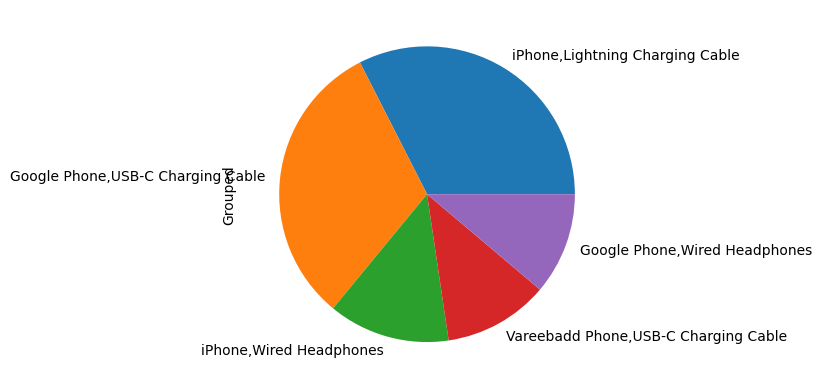

In [113]:
df2["Grouped"].value_counts()[0:5].plot.pie()